In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train) , (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

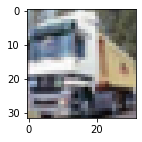

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1])

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [40]:
def plot_sample(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

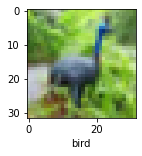

In [8]:
plot_sample(x_train, y_train,6)

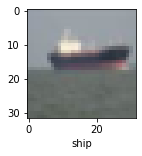

In [9]:
plot_sample(x_train, y_train,69)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 72s 45ms/step - loss: 1.8149 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6251 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5429 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4837 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4310 - accuracy: 0.4937


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.46      0.52      1000
           1       0.63      0.57      0.60      1000
           2       0.45      0.19      0.27      1000
           3       0.30      0.47      0.37      1000
           4       0.48      0.39      0.43      1000
           5       0.39      0.35      0.37      1000
           6       0.48      0.59      0.53      1000
           7       0.62      0.47      0.54      1000
           8       0.45      0.78      0.57      1000
           9       0.56      0.52      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



## We are taking the convolutional layer to be 3x3 in size, and then reducing (pooling) it to 2x2 to reduce the size

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4844 - accuracy: 0.4660
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1237 - accuracy: 0.6072
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9987 - accuracy: 0.6541
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9127 - accuracy: 0.6832
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8428 - accuracy: 0.7081
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7867 - accuracy: 0.7283
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7404 - accuracy: 0.7430
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6967 - accuracy: 0.7593
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6570 - accuracy: 0.7716
Epoch 10/10
1563/1563 [==============================] - 31s 20m

# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN (49%). CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [19]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.0421266e-04, 6.0673883e-05, 1.3195676e-03, 9.6704501e-01,
        2.8555808e-04, 1.9561509e-02, 1.2909079e-03, 4.9482343e-05,
        9.5651075e-03, 7.1789842e-04],
       [4.7695022e-02, 1.2391741e-01, 6.0783864e-06, 1.6889046e-05,
        1.1481233e-06, 8.4402188e-08, 3.3186402e-07, 3.2493428e-08,
        8.2787997e-01, 4.8300769e-04],
       [6.4865544e-02, 1.0884557e-01, 3.2611066e-04, 8.7355673e-03,
        1.3125038e-03, 7.3722028e-04, 7.1503702e-05, 6.5480997e-03,
        4.9227604e-01, 3.1628188e-01],
       [9.6823812e-01, 3.1810100e-03, 5.8281398e-04, 7.5147010e-04,
        3.9563074e-05, 2.9693877e-06, 1.0030963e-06, 9.1386410e-06,
        2.5613436e-02, 1.5804891e-03],
       [5.0207464e-06, 1.1550294e-04, 3.5349313e-02, 6.2748879e-02,
        4.0110779e-01, 5.1620658e-03, 4.9540380e-01, 7.4190604e-05,
        3.1640171e-05, 1.7760607e-06]], dtype=float32)

## Argmax to find out the INDEX OF max element among these

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test = y_test.reshape(-1,)

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

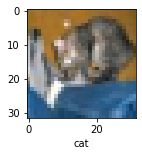

In [42]:
plot_sample(x_test, y_test,0)

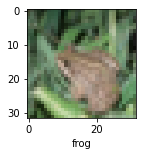

In [43]:
plot_sample(x_test, y_test,4)

In [45]:
classes[y_classes[0]]

'cat'

In [44]:
classes[y_classes[4]]

'frog'

## Predicting them well

In [28]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9182 - accuracy: 0.6990


[0.9181680679321289, 0.6990000009536743]